In [1]:
from evaluation import df_experiment, plot_df
import evaluation
import matplotlib.pyplot as plt

In [2]:
df = plot_experiment('onerule')
plt.figure()
df['cumsum_correcting'].plot(label='correcting')
df['cumsum_random'].plot(label='random')
plt.legend()
plt.show()

NameError: name 'plot_experiment' is not defined

In [7]:
for c in df.columns:
    print(c)

correcting
random


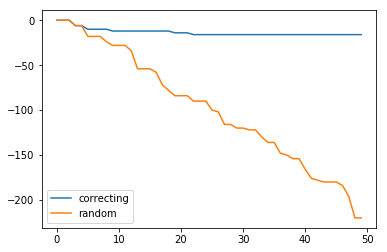

In [2]:
df = df_experiment('simplecolours',file_modifiers='_train_negative3')
plot_df(df, 'simplecolours', file_modifiers='_train_negative3')

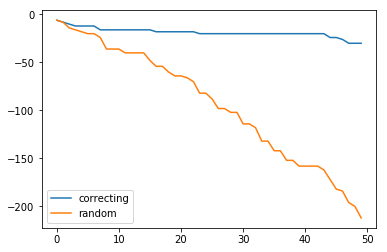

In [3]:
df = df_experiment('onerule', file_modifiers='_train_negative3')
plot_df(df, 'onerule', file_modifiers='_train_negative3')

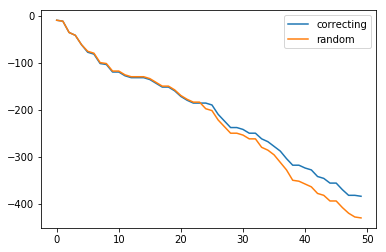

In [53]:
df = df_experiment('tworules', file_modifiers='_train_negative4')
plot_df(df, 'tworules', file_modifiers='_train_negative4')

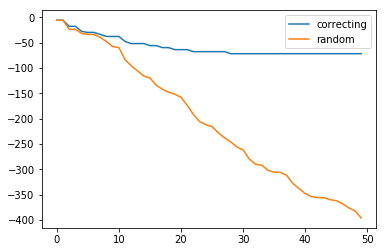

In [10]:
df = df_experiment('bijection', file_modifiers='_train_negative3')
plot_df(df, 'bijection', file_modifiers='_train_negative3')

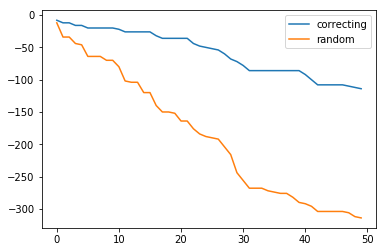

In [50]:
df = df_experiment('maroon2', file_modifiers='_train_negative4')
plot_df(df, 'maroon2', file_modifiers='_train_negative4')

In [5]:
import pickle
from colour_dict import colour_dict, simple_colour_dict


In [6]:
def load_agent(dataset, threshold=0.7, file_modifiers=''):
    with open('results/agents/correcting_{}_{}{}.pickle'.format(dataset, threshold, file_modifiers), 'rb') as f:
        agent = pickle.load(f)
    return agent
def plot_colours(dataset, threshold=0.7, file_modifiers='', colour_dict=colour_dict):
    agent = load_agent(dataset, threshold=threshold, file_modifiers=file_modifiers)
    for cm in agent.colour_models.values():
        probs = evaluation.colour_probs(cm, colour_dict, prior=0.5)
        confusion = evaluation.colour_confusion(cm.name, probs)
        print(cm.name, confusion)
        cm.draw(save_location_basename=dataset)

findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/Users/mappelgren/Desktop/fnlp/venv/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


red {'tp': 5, 'fp': 0, 'fn': 0, 'tn': 37}
blue {'tp': 9, 'fp': 0, 'fn': 0, 'tn': 33}


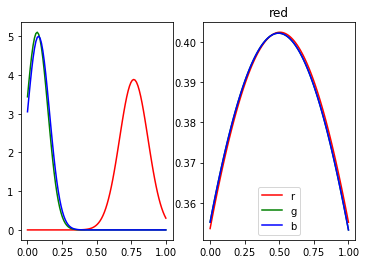

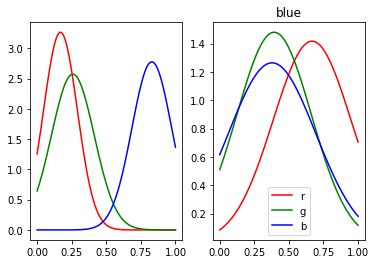

In [7]:
plot_colours('onerule', file_modifiers='_train_negative3')

red {'tp': 1, 'fp': 0, 'fn': 0, 'tn': 6}
blue {'tp': 1, 'fp': 0, 'fn': 0, 'tn': 6}


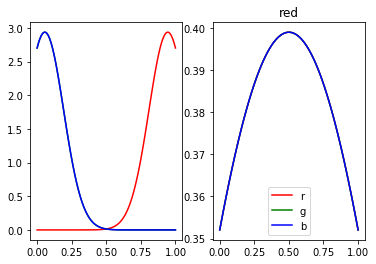

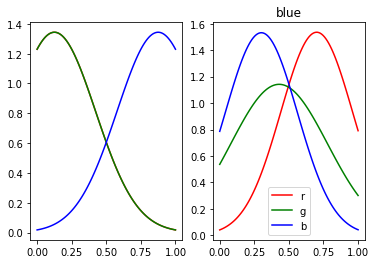

In [8]:
plot_colours('simplecolours', colour_dict=simple_colour_dict, file_modifiers='_train_negative3')

green {'tp': 6, 'fp': 0, 'fn': 4, 'tn': 32}
yellow {'tp': 3, 'fp': 0, 'fn': 0, 'tn': 39}


/Users/mappelgren/Desktop/correcting-agent/prob_model.py:71: RuntimeWarning: invalid value encountered in double_scalars
  return [p0, p1][c]/(p1 + p0)


red {'tp': 1, 'fp': 0, 'fn': 4, 'tn': 37}
blue {'tp': 9, 'fp': 12, 'fn': 0, 'tn': 21}


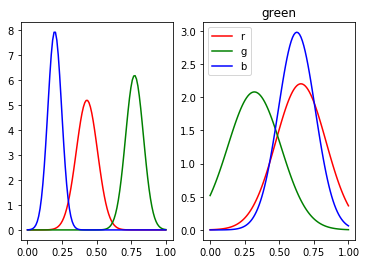

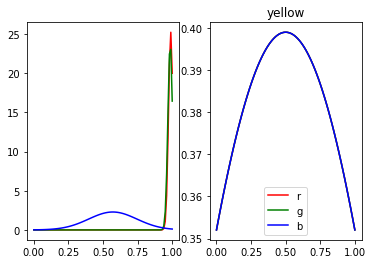

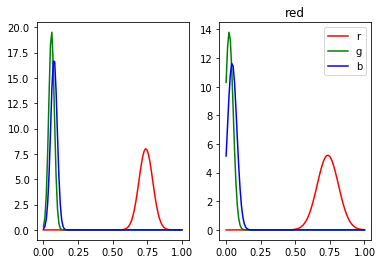

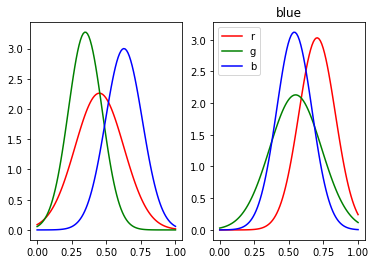

In [52]:
plot_colours('tworules', file_modifiers='_train_negative4')

red {'tp': 1, 'fp': 0, 'fn': 4, 'tn': 37}
blue {'tp': 9, 'fp': 5, 'fn': 0, 'tn': 28}
green {'tp': 10, 'fp': 3, 'fn': 0, 'tn': 29}
maroon {'tp': 0, 'fp': 12, 'fn': 0, 'tn': 30}


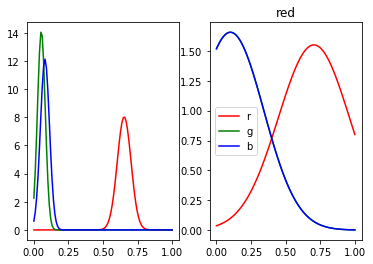

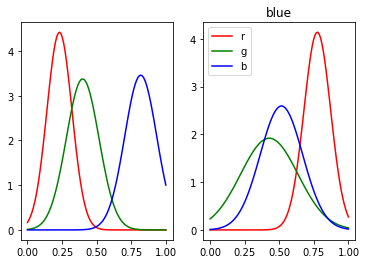

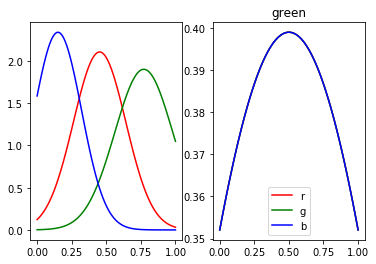

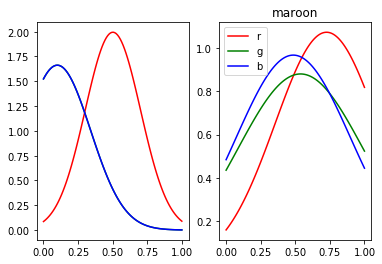

In [51]:
plot_colours('maroon2', file_modifiers='_train_negative4')

red {'tp': 5, 'fp': 0, 'fn': 0, 'tn': 37}
blue {'tp': 9, 'fp': 1, 'fn': 0, 'tn': 32}


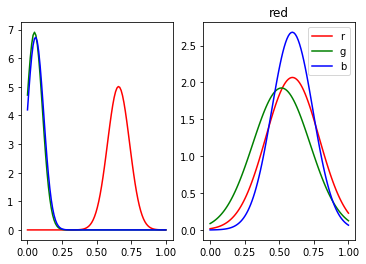

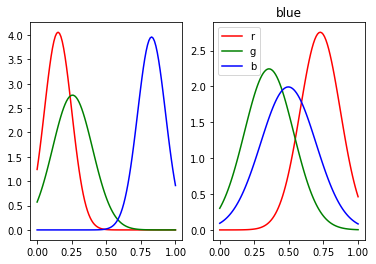

In [11]:
plot_colours('bijection', file_modifiers='_train_negative3')

{'tp': 1, 'fp': 0, 'fn': 4, 'tn': 37}
{'tp': 4, 'fp': 15, 'fn': 5, 'tn': 18}
{'tp': 7, 'fp': 11, 'fn': 3, 'tn': 21}
{'tp': 3, 'fp': 20, 'fn': 0, 'tn': 19}


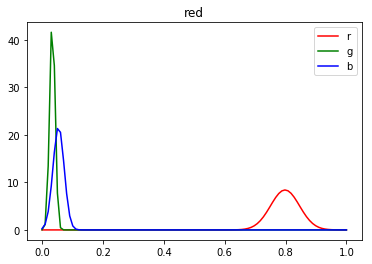

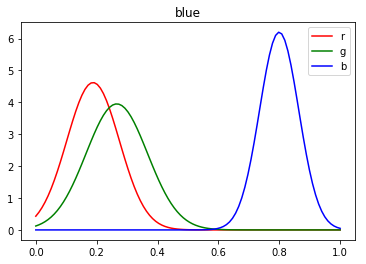

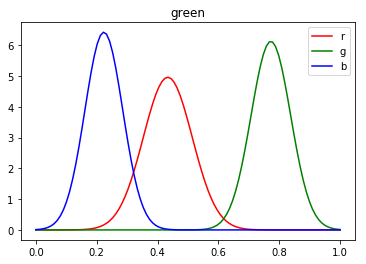

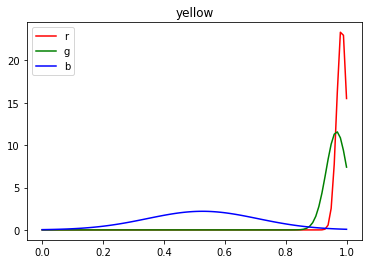

In [33]:
for cm in agent.colour_models.values():
    probs = evaluation.colour_probs(cm, colour_dict, prior=0.5)
    confusion = evaluation.colour_confusion(cm.name, probs)
    print(confusion)
    cm.draw()

In [29]:
for rm in agent.rule_models.values():
    rm = rm


In [32]:
rm.rule_belief.belief

array([[0.001, 0.999],
       [0.   , 0.   ]])

In [9]:
'' in 'hello'

True

In [14]:
a = load_agent('bijection', file_modifiers='_train_negative3')

In [15]:
pm = a.rule_models[('(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))',
  '(forall (?y) (or (not (blue ?y)) (exists (?x) (and (red ?x) (on ?x ?y)))))')]
pm.rule_belief.belief

array([[1.00000000e-03, 9.98982538e-01],
       [1.74616902e-05, 0.00000000e+00]])

In [17]:
a = load_agent('onerule', file_modifiers='_train_negative3')
pm = a.rule_models[('(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))',
  '(forall (?y) (or (not (blue ?y)) (exists (?x) (and (red ?x) (on ?x ?y)))))')]
pm.rule_belief.belief

array([[0.001, 0.999],
       [0.   , 0.   ]])

In [23]:
a = load_agent('tworules', file_modifiers='_train_negative3')
for name in a.rule_models.keys():
    pm = a.rule_models[name]
    print(name)
    print(pm.rule_belief.belief)

('(forall (?x) (or (not (green ?x)) (exists (?y) (and (yellow ?y) (on ?x ?y)))))', '(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))')
[[0.001 0.   ]
 [0.999 0.   ]]
('(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))', '(forall (?y) (or (not (blue ?y)) (exists (?x) (and (red ?x) (on ?x ?y)))))')
[[0.001 0.999]
 [0.    0.   ]]


In [28]:
a = load_agent('onerule', file_modifiers='_train_negative3')
for name in a.rule_models.keys():
    pm = a.rule_models[name]
    print(name)
    print(pm.rule_belief.belief)

('(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))', '(forall (?y) (or (not (blue ?y)) (exists (?x) (and (red ?x) (on ?x ?y)))))')
[[0.001 0.999]
 [0.    0.   ]]


In [29]:
a = load_agent('simplecolours', file_modifiers='_train_negative3')
for name in a.rule_models.keys():
    pm = a.rule_models[name]
    print(name)
    print(pm.rule_belief.belief)

('(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))', '(forall (?y) (or (not (blue ?y)) (exists (?x) (and (red ?x) (on ?x ?y)))))')
[[1.00000000e-03 9.99000000e-01]
 [1.06158243e-20 0.00000000e+00]]


In [31]:
a = load_agent('tworules', file_modifiers='_train_negative3')
for name in a.rule_models.keys():
    pm = a.rule_models[name]
    print(name)
    print(pm.rule_belief.belief)

('(forall (?x) (or (not (green ?x)) (exists (?y) (and (yellow ?y) (on ?x ?y)))))', '(forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y)))))')
[[0.001 0.   ]
 [0.999 0.   ]]
('(forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y)))))', '(forall (?y) (or (not (blue ?y)) (exists (?x) (and (red ?x) (on ?x ?y)))))')
[[0.001 0.999]
 [0.    0.   ]]


In [46]:
import numpy as np
a.colour_models['yellow'].p(1, np.array([1, 1, 1]))

0.9984702751525886